# CIFAR_10 using CNN


In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,datasets
import PIL
import tensorflow as tf


In [2]:
#Loading the dataset
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [3]:
'''There are totally 60000 datasets in which we divide 50000 for training & 10000 fore testing samples
each class contains 6000 images,each images has 3 rgb color channels and 32 X32 pixel dimensions'''
print("Train_Samples:",train_images.shape,train_labels.shape)
print("Test_Samples:",test_images.shape,test_labels.shape)

Train_Samples: (50000, 32, 32, 3) (50000, 1)
Test_Samples: (10000, 32, 32, 3) (10000, 1)


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

C:\Users\Sushmitha S\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


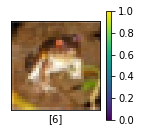

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

"""The matplotlib function imshow() creates an image from a 2-dimensional numpy array."""

plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.show()

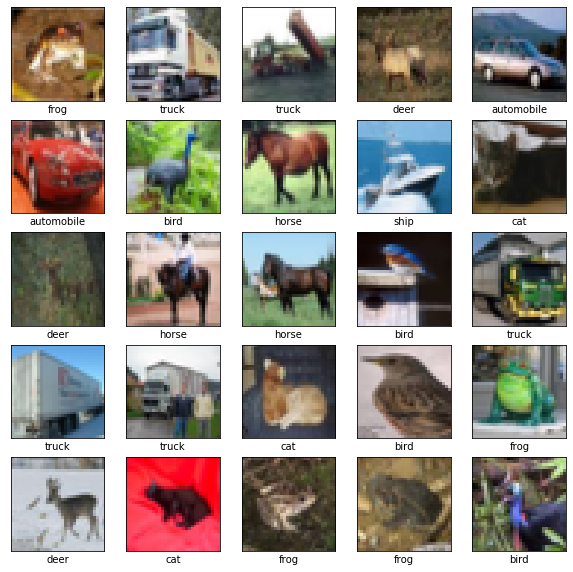

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)#(rows,column,pannel number)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
    

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 1.5079 - accuracy: 0.4501 - val_loss: 1.2150 - val_accuracy: 0.5740
Epoch 2/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.1614 - accuracy: 0.5884 - val_loss: 1.0837 - val_accuracy: 0.6223
Epoch 3/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 1.0165 - accuracy: 0.6403 - val_loss: 1.0359 - val_accuracy: 0.6345
Epoch 4/10
50000/50000 [==============================] - 78s 2ms/sample - loss: 0.9180 - accuracy: 0.6766 - val_loss: 0.9950 - val_accuracy: 0.6596
Epoch 5/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 0.8410 - accuracy: 0.7044 - val_loss: 0.9370 - val_accuracy: 0.6814
Epoch 6/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 0.7808 - accuracy: 0.7242 - val_loss: 0.9058 - val_accuracy: 0.6866
Epoch 7/10
50000/50000 [==============================] 

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



10000/10000 - 3s - loss: 0.8920 - accuracy: 0.7054

Test accuracy: 0.7054


10000/10000 - 3s - loss: 0.8920 - accuracy: 0.7054


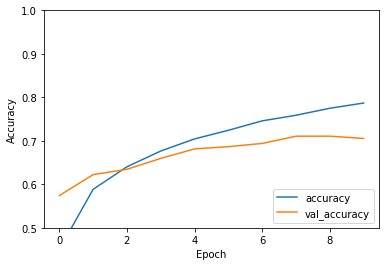

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)
predictions

array([[1.6178232e-02, 4.4438508e-03, 7.2595086e-03, ..., 6.9517130e-03,
        4.6389982e-02, 1.8049186e-03],
       [9.6806565e-05, 1.4993121e-04, 1.4838037e-09, ..., 2.0869781e-09,
        9.9975222e-01, 9.2539398e-07],
       [6.2032271e-02, 2.9342767e-02, 2.6316724e-03, ..., 3.0173238e-03,
        8.9585090e-01, 3.7058489e-03],
       ...,
       [7.2367893e-06, 5.1237959e-07, 7.2780508e-03, ..., 5.7796214e-02,
        3.6917022e-06, 1.1117854e-05],
       [9.6662203e-03, 8.9910930e-01, 4.9126465e-03, ..., 2.8166315e-02,
        2.3670690e-04, 8.8827923e-04],
       [1.1529062e-08, 4.3682356e-08, 2.7209666e-07, ..., 9.9960893e-01,
        6.1158524e-08, 7.4207573e-09]], dtype=float32)

In [16]:
predictions[0]

array([1.6178232e-02, 4.4438508e-03, 7.2595086e-03, 5.0623989e-01,
       4.9277843e-04, 1.1200662e-01, 2.9823247e-01, 6.9517130e-03,
       4.6389982e-02, 1.8049186e-03], dtype=float32)

In [17]:
np.argmax(predictions[0])

3

In [18]:
test_labels[0]

array([3], dtype=uint8)

In [19]:
def plot_image( predictions_array, true_label, img):
  i
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{}".format(class_names[predicted_label]),
                                color=color, fontsize=20)


def plot_value_array( predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('blue')


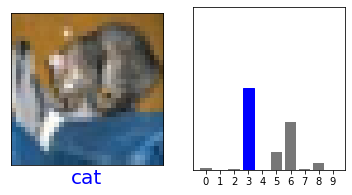

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image( predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array( predictions[i],  test_labels)
plt.show()

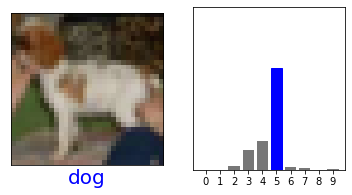

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array( predictions[i],  test_labels)
plt.show()

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


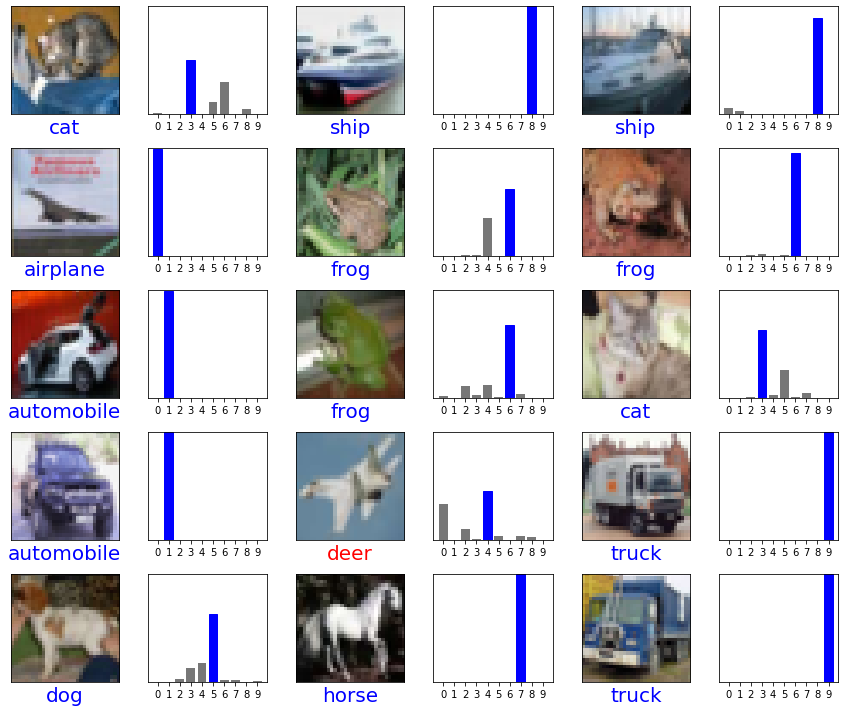

In [22]:
print(class_names)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array( predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
from keras.models import load_model 
model.save('CIFAR_model.h5')

Using TensorFlow backend.


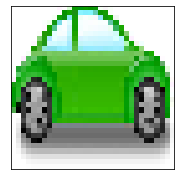

In [66]:
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =image.load_img('img.jpg',target_size =(32,32))
plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])
plt.imshow(test_image1)

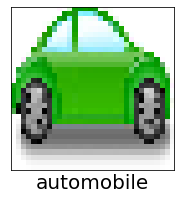

In [78]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict_classes(test_image) 
plt.figure(figsize=(3,3))
plt.xticks([])
plt.yticks([])

plt.imshow(test_image1)
if result[0]==0:
    plt.xlabel('airplane',fontsize=20 )
elif result[0]==1:
    plt.xlabel('automobile',fontsize=20)
elif result[0]==2:
    plt.xlabel('bird',fontsize=20)
elif result[0]==3:
    plt.xlabel('cat',fontsize=20)
elif result[0]==4:
    plt.xlabel('deer',fontsize=20)
elif result[0]==5:
    plt.xlabel('dog',fontsize=20)
elif result[0]==6:
    plt.xlabel('frog',fontsize=20)
elif result[0]==7:
    plt.xlabel('horse',fontsize=20)
elif result[0]==8:
    plt.xlabel('ship',fontsize=20)
elif result[0]==9:
    plt.xlabel('truck',fontsize=20)
else:
    print("Error")

    